In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
ref = pd.read_excel("D:\IIT\PhD projects\dG study\datasets\circle seq off-target dataset.xlsx")

In [4]:
df = pd.read_excel("D:\IIT\PhD projects\dG study\dG for off-t sets\circleseq-with-dG.xlsx")
df.head()

,target,off-target,reads,dG(rec3-hybrid),dG(DNA-RNA),cell,#mm,reads/target/cell line
0,GAACACAAAGCATAGACTGCGGG,AAACATAAAGCATAGACTGCAAA,0,-134.08,-165.35,HEK293,4,0.000000
1,GAACACAAAGCATAGACTGCGGG,AAACATAAAGCATAGACTGCAAA,10,-134.08,-165.35,K562,4,0.002725
2,GAACACAAAGCATAGACTGCGGG,GAACACAATGCATAGATTGCCGG,196,-125.18,-146.79,HEK293,2,0.112000
3,GAACACAAAGCATAGACTGCGGG,GAACACAATGCATAGATTGCCGG,338,-125.18,-146.79,K562,2,0.092098
4,GAACACAAAGCATAGACTGCGGG,GAACACAAAGCATAGACTGCGGG,1750,-120.50,-177.14,HEK293,0,1.000000


In [5]:
ref_target=[]
for i in range(len(ref)):
    ref_target.append(ref.loc[i, "TargetSequence"])

In [6]:
ref_offtarget =[]
for i in range(len(ref)):
    ref_offtarget.append(ref.loc[i,"Off-target Sequence"])

In [7]:
ref_cell = []
for i in range(len(ref)):
    ref_cell.append(ref.loc[i,"Cell"])

In [8]:
df_target =[]
for i in range(len(df)):
    df_target.append(df.loc[i,"target"])

In [9]:
df_offtarget = []
for i in range(len(df)):
    df_offtarget.append(df.loc[i, "off-target"])

In [10]:
df_cell= []
for i in range(len(df)):
    df_cell.append(df.loc[i,"cell"])

In [11]:
#to find missing values in df dataframe
for i in range(len(df)):
    for j in range(len(ref)):
        if (df_target[i] == ref_target[j]) & (df_cell[i] == ref_cell[j]):
            if df_offtarget[i][:20] == ref_offtarget[j][:20]:
                df_offtarget[i] = ref_offtarget[j]

In [12]:
for i in range(len(df_offtarget)):
    if len(df_offtarget[i]) == 20:
        print(i)
    else:
        pass

118
121
172


In [13]:
df_offtarget[121] = "AGCACCATGGCTAGAGGTGTGGG"
df_offtarget[118] = "GGCACTGCAGCCTGGGGGTGGGG"
df_offtarget[172] = "GGTGAGTGAGTGTGTGCGGGTGG"
df_cell[121] = "HEK293"
df_cell[118] = "HEK293"
df_cell[172] = "U2OS"
df["Chromosome"] = ref["Chromosome"]
df.loc[121,"Chromosome"] = 6
df.loc[118, "Chromosome"] = 10
df.loc[172, "Chromosome"] = 11
df.loc[121, "#mm"] = 6
df.loc[118, "#mm"] =6
df.loc[172, "#mm"] =1
df["Strand"] = ref["Strand"]
df.loc[121, "Strand"] = '-'
df.loc[118, "Strand"] = '-'
df.loc[172, "Strand"]='+'

In [14]:
df_cellH = []
df_cellK = []
df_cellU = []

In [15]:
#one hot encoding for df_cell
for i in range(len(df)):
    if df_cell[i][0] == 'K' :
        df_cellH.append(0)
        df_cellK.append(1)
        df_cellU.append(0)
    elif df_cell[i][0] == 'H':
        df_cellH.append(1)
        df_cellK.append(0)
        df_cellU.append(0)
    elif df_cell[i][0] == 'U':
        df_cellH.append(0)
        df_cellK.append(0)
        df_cellU.append(1)

In [16]:
#to make a 2D array pos_mm to store 1 at places where there is a mismatch in the sequences
pos_mm = []
for i in range(len(df)):
    l=[]
    for j in range(23):
        if (df_target[i][j]== df_offtarget[i][j] or df_target[i][j] == 'N' or df_offtarget[i][j] == 'N'):
            l.append(0)
        else:
            l.append(1)
    x = np.transpose(l)
    pos_mm.append(x)

In [17]:
x = pd.DataFrame(pos_mm, columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

In [18]:
len(df_cellH)

186

In [19]:
x['Cell H'] = df_cellH
x['Cell K'] = df_cellK
x['Cell U'] = df_cellU
x['Chromosome'] = df[['Chromosome']]
x['#mm'] = df[['#mm']]

In [20]:
df.loc[67, "Strand"]

'+'

In [21]:
len(df)

186

In [22]:
#convert strand into numeric values
strand = []
for i in range(len(df)):
    if df.loc[i,"Strand"] == "+":
        df.loc[i,"Strand"] = 1
    elif df.loc[i,"Strand"] == "-":
        df.loc[i,"Strand"] = 0
    else:
        pass

In [23]:
df["Strand"]

0      1
1      0
2      1
3      0
4      1
      ..
181    1
182    0
183    1
184    1
185    1
Name: Strand, Length: 186, dtype: int64

In [24]:
x['Strand'] = df[['Strand']]

In [25]:
#to form lists of transitions, transversions and indels in the Off-target Sequence
count_transversions=[]
count_transitions =[]
count_indels=[]


for i in range(len(x)):
    a=0
    b=0
    c=0
    for j in range(23):
        if (df_target[i][j] == 'A') and ((df_offtarget[i][j] == 'C') or (df_offtarget[i][j] == 'T')):
            a=a+1
        elif (df_target[i][j] == 'G') and ((df_offtarget[i][j] == 'T') or (df_offtarget[i][j] == 'C')):
            a=a+1
        elif (df_target[i][j] == 'C') and ((df_offtarget[i][j] == 'G') or (df_offtarget[i][j] == 'A')):
            a=a+1
        elif (df_target[i][j] == 'T') and ((df_offtarget[i][j] == 'A') or (df_offtarget[i][j] == 'G')):
            a=a+1
        elif (df_target[i][j] == 'A') and (df_offtarget[i][j] == 'G'):
            b=b+1
        elif (df_target[i][j] == 'G') and (df_offtarget[i][j] == 'A'):
            b=b+1
        elif (df_target[i][j] == 'C') and (df_offtarget[i][j] == 'T'):
            b=b+1
        elif (df_target[i][j] == 'T') and (df_offtarget[i][j] == 'C'):
            b=b+1
        elif (df_offtarget[i][j] == '-'):
            c=c+1
        else:
            pass
    count_transversions.append(a)
    count_transitions.append(b)
    count_indels.append(c)

In [26]:
#to form list of pam_transitions, pam_transversions and pam_indels in last position of off-target Sequence
pam_transversions1=[]
pam_transitions1 =[]
pam_indels1=[]

for i in range(len(x)):
    if ((df_offtarget[i][-1]) == 'G'):
        pam_transversions1.append(0)
        pam_transitions1.append(0)
        pam_indels1.append(0)
    
    elif (df_offtarget[i][-1] == 'A'):
        pam_transitions1.append(1)
        pam_transversions1.append(0)
        pam_indels1.append(0)
    
    elif (df_offtarget[i][-1] =='C') or (df_offtarget[i][-1] == 'T'):
        pam_transversions1.append(1)
        pam_transitions1.append(0)
        pam_indels1.append(0)
    
    elif (df_offtarget[i][-1] == '-'):
        pam_indels1.append(1)
        pam_transitions1.append(0)
        pam_transversions1.append(0)
    
    else:
        pass

In [27]:
#to form list of pam_transitions, pam_transversions and pam_indels in second last position of off-target Sequence
pam_transversions2=[]
pam_transitions2 =[]
pam_indels2=[]

for i in range(len(x)):
    if ((df_offtarget[i][-2]) == 'G'):
        pam_transversions2.append(0)
        pam_transitions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] == 'A'):
        pam_transitions2.append(1)
        pam_transversions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] =='C'):
        pam_transversions2.append(1)
        pam_transitions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] == 'T'):
        pam_transversions2.append(1)
        pam_transitions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] == '-'):
        pam_indels2.append(1)
        pam_transitions2.append(0)
        pam_transversions2.append(0)
    
    else:
        print(i)

In [28]:
pam_transitions = []
pam_transversions = []
pam_indels = []
for i in range(len(df)):
    pam_transitions.append(pam_transitions1[i] + pam_transitions2[i])
    pam_transversions.append(pam_transversions1[i] + pam_transversions2[i])
    pam_indels.append(pam_indels1[i]+pam_indels2[i])

In [29]:
#to calculate distance in x
distance = []
for i in range(len(x)):
    a = pam_transitions[i]+pam_transversions[i]+pam_indels[i]+count_transitions[i]+count_transversions[i]+count_indels[i]
    distance.append(a)

In [30]:
#to calculate pam_mm in x
pam_mm =[]
for i in range(len(x)):
    a = pam_transitions[i]+pam_transversions[i]+pam_indels[i]
    pam_mm.append(a)
x['pam_mm'] = pam_mm

In [31]:
#to calculate percent of G and C in off-target Sequence
percent_gc = []
for i in range(len(x)):
    a=0
    for j in range(23):
        if (df_offtarget[i][j] == 'G' or df_offtarget[i][j]== 'C'):
            a= a+1
    percent_gc.append((a/len(df_offtarget[i]))*100)    

In [32]:
#to calculate number of G and C from position 11 to 20 in Off-target Sequence
seed_gc = []
for i in range(len(x)):
    a=0
    for j in range(10):
        if (df_offtarget[i][-1-(j+3)] =='G' or df_offtarget[i][-1-(j+3)] == 'C'):
            a=a+1
    seed_gc.append((a/10)*100)

In [33]:
x['pam_transitions'] = pam_transitions
x['pam_transversions'] = pam_transversions
x['pam_indels'] = pam_indels
x['count_transitions'] = count_transitions
x['count_transversions'] = count_transversions
x['count_indels'] = count_indels
x['distance'] = distance
x['percent_gc'] = percent_gc
x['seed_gc'] = seed_gc
x['dG_rec3'] = df[['dG(rec3-hybrid)']]
x['dG_DNA'] = df[['dG(DNA-RNA)']]

In [34]:
x.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Cell H',
       'Cell K', 'Cell U', 'Chromosome', '#mm', 'Strand', 'pam_mm',
       'pam_transitions', 'pam_transversions', 'pam_indels',
       'count_transitions', 'count_transversions', 'count_indels', 'distance',
       'percent_gc', 'seed_gc', 'dG_rec3', 'dG_DNA'],
      dtype='object')

In [35]:
#to convert Chromosome column into integers
for i in range(len(x)):
    if (x.loc[i,"Chromosome"] == 'X'):
        x.loc[i,"Chromosome"] = 23
    elif (x.loc[i,"Chromosome"] == 'Y'):
        x.loc[i,"Chromosome"] = 24
    else:
        pass

In [36]:
y = []
for i in range(len(df)):
    y.append(df.loc[i,"reads/target/cell line"])

In [37]:
#implementing random forest for the dataset, and finding values for random state and n_estimators y2
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

MAE1=[]
R1= []
I1 =[]
J1= []

for i in range(40):
    for j in range(10):
       
        regressor = RandomForestRegressor(n_estimators = i+1, random_state =j)
        regressor.fit(x, y)
        y_pred = regressor.predict(x)
        MAE1.append(metrics.mean_absolute_error(y, y_pred))
        R1.append(metrics.r2_score(y, y_pred))
        I1.append(i)
        J1.append(j)

In [38]:
R1.index(max(R1))
print(R1[176])
print(MAE1[176])
print(I1[176])
print(J1[176])

0.9367345718056941
0.05505937356608556
17
6


In [39]:
#cross val for Random Forest
regressor = RandomForestRegressor(n_estimators = 18, random_state=6)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits = 5, random_state = 1, shuffle = True)
scores = cross_val_score(regressor, x,y, scoring = "neg_mean_squared_error", cv = crossvalidation, n_jobs = 5)
print("Folds: " +str(len(scores)) + ", MSE: "+ str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
print(metrics.r2_score(y, y_pred))

regressor.fit(x, y)

Folds: 5, MSE: 0.04707610838414361, STD: 0.008930750849530085
0.9249324029291747


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=18,
                      n_jobs=None, oob_score=False, random_state=6, verbose=0,
                      warm_start=False)

In [45]:
data=x
data['y'] = y
data.drop(["count_indels", "pam_indels"], axis=1, inplace = True)

In [50]:
#x.drop(["y"], axis=1, inplace=True)
a = data.columns

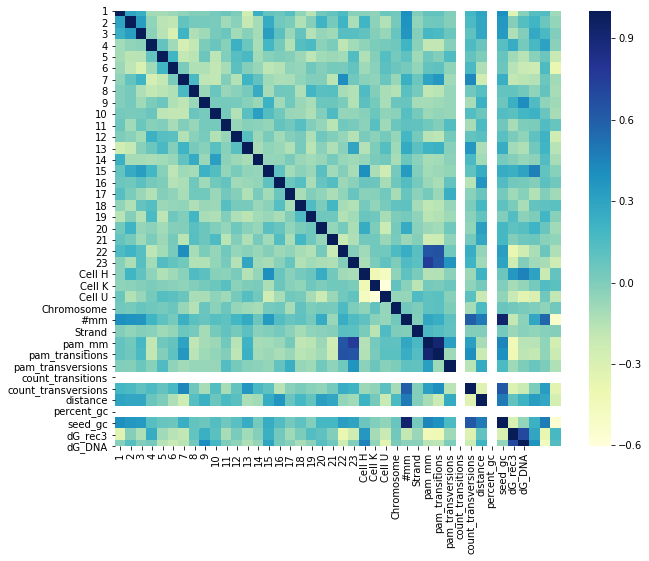

In [51]:
#to plot co-relation matrix
import seaborn as sbs
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,8))
heat_map = sbs.heatmap(corr, xticklabels = data.columns, yticklabels = data.columns, cmap="YlGnBu")

<Figure size 4320x2160 with 0 Axes>

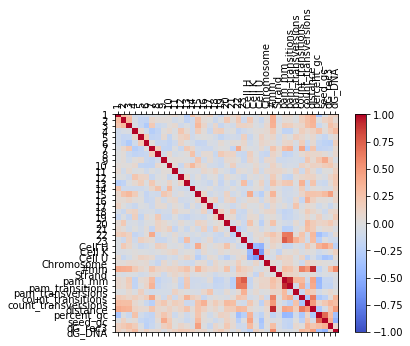

<Figure size 4320x2160 with 0 Axes>

In [55]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.figure(figsize=(60,30))

In [56]:
corr.iloc[1][2]

0.3255389083412324

In [57]:
#to find co-relation features
matrix_val = []
val_i=[]
val_j=[]
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        if ((corr.iloc[i][j] < -0.5) or (corr.iloc[i][j] > 0.5)) and (corr.iloc[i][j] != 1.0):
            matrix_val.append(corr.iloc[i][j])
            val_i.append(i)
            val_j.append(j)
            

In [58]:
for i in range(len(matrix_val)):
    print(val_i[i],val_j[i],matrix_val[i])

21 29 0.6383846806863548
21 30 0.6512124224961933
22 29 0.7596743428694882
22 30 0.6418807284575696
24 25 -0.6024668223704762
25 24 -0.6024668223704762
27 32 0.6056364790688213
27 34 0.9338288154417094
27 38 0.5681355574230879
29 21 0.6383846806863548
29 22 0.7596743428694882
29 30 0.9176641229663006
30 21 0.6512124224961933
30 22 0.6418807284575696
30 29 0.9176641229663006
32 27 0.6056364790688213
32 34 0.6317459322513814
34 27 0.9338288154417094
34 32 0.6317459322513814
35 36 0.7054269354514772
36 35 0.7054269354514772
38 27 0.5681355574230879


In [60]:
#x.drop(["y"], axis=1, inplace=True
#x.drop(["y"], axis=1, inplace=True)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf = RandomForestRegressor(n_estimators = 18, random_state=6) 
rf.fit(x, y)
rf.score(x, y)

y_pred = rf.predict(x)

print("MAE: ",metrics.mean_absolute_error(y, y_pred))
print("R2: ",metrics.r2_score(y, y_pred))
print("Mean squared value:", metrics.mean_squared_error(y, y_pred))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("Variance weighted:", metrics.explained_variance_score(y, y_pred))

MAE:  0.0560961410387897
R2:  0.9358453252001935
Mean squared value: 0.005639098891477607
Root mean square value: 0.07509393378614286
Variance weighted: 0.9358460192910842


In [62]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = data.columns, columns=['importance']).sort_values('importance', ascending=False)

In [63]:
print(feature_importances)

                     importance
#mm                    0.204843
distance               0.203364
dG_DNA                 0.100232
dG_rec3                0.077678
6                      0.066335
Chromosome             0.046635
percent_gc             0.032064
18                     0.023341
Cell U                 0.021361
seed_gc                0.018393
1                      0.017004
count_transitions      0.016963
12                     0.015114
Cell K                 0.014440
16                     0.014383
count_transversions    0.011510
5                      0.011461
pam_mm                 0.010396
10                     0.009094
4                      0.008869
Strand                 0.008237
11                     0.008072
13                     0.008003
7                      0.007364
19                     0.006770
Cell H                 0.006533
3                      0.005018
17                     0.004624
8                      0.003998
21                     0.003823
23      

In [64]:
features=x.columns

Text(0.5, 0, 'Relative Importance')

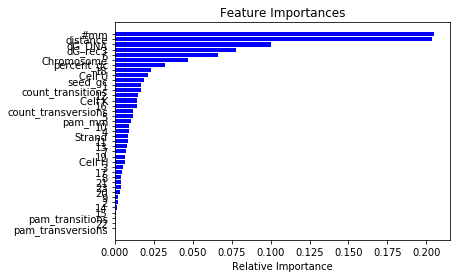

In [65]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

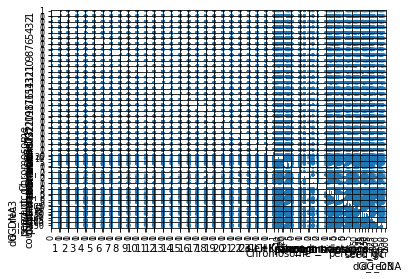

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(x)
plt.show()

In [68]:
max(R1), max(MAE1), min(R1), min(MAE1)

(0.9367345718056941,
 0.080323137931941,
 0.5805173778042513,
 0.05505937356608556)

In [69]:
#plot R^2 and error in excel
R1= np.array(R1)
I1= np.array(I1)
J1= np.array(J1)
MAE1= np.array(MAE1)

In [70]:
array=np.vstack((I1,J1,R1,MAE1))

In [71]:
array=np.transpose(array)

In [72]:
excel=pd.DataFrame(array)

In [73]:
len(excel.columns)

4

In [74]:
excel.to_excel("D:\IIT\PhD projects\Position study\dG for off-t sets\indices and r-error.xlsx")

In [75]:
import shap

In [88]:
explainer= shap.TreeExplainer(rf)

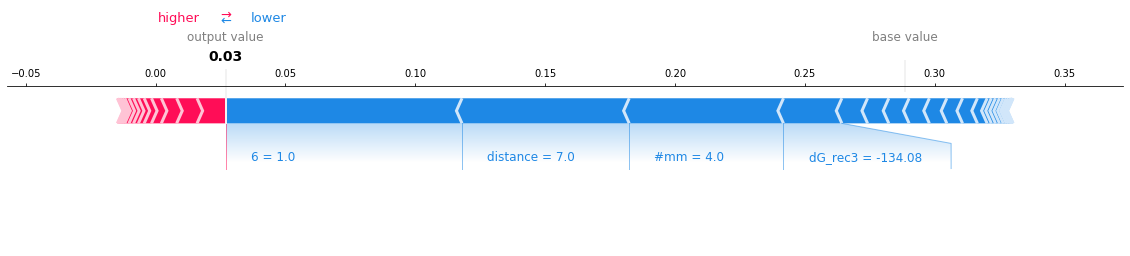

In [89]:
shap_values= explainer.shap_values(x)
shap.force_plot(explainer.expected_value, shap_values[0,:], x.iloc[0,:], matplotlib = "True")

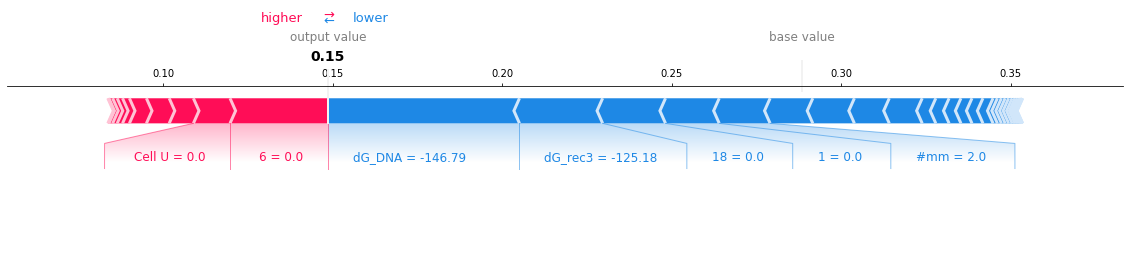

In [90]:
shap.force_plot(explainer.expected_value, shap_values[2,:], x.iloc[2,:], matplotlib=True)

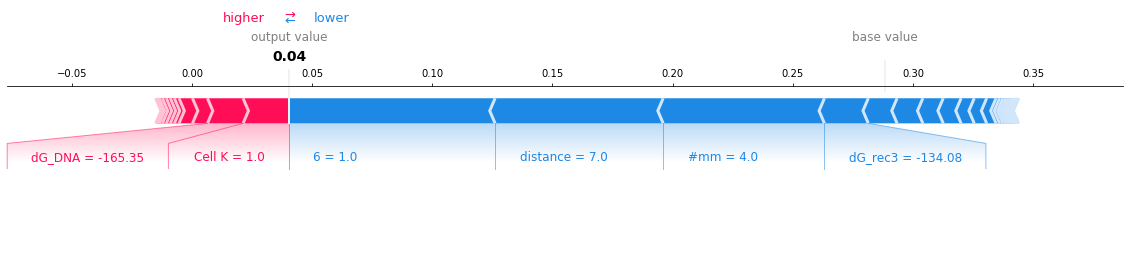

In [91]:
shap.force_plot(explainer.expected_value, shap_values[1,:], x.iloc[1,:], matplotlib=True)

In [92]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x)

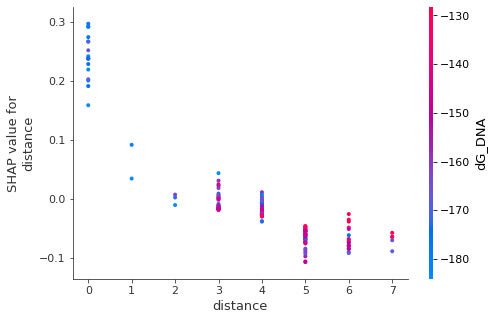

In [98]:
shap.dependence_plot("distance", shap_values, x)

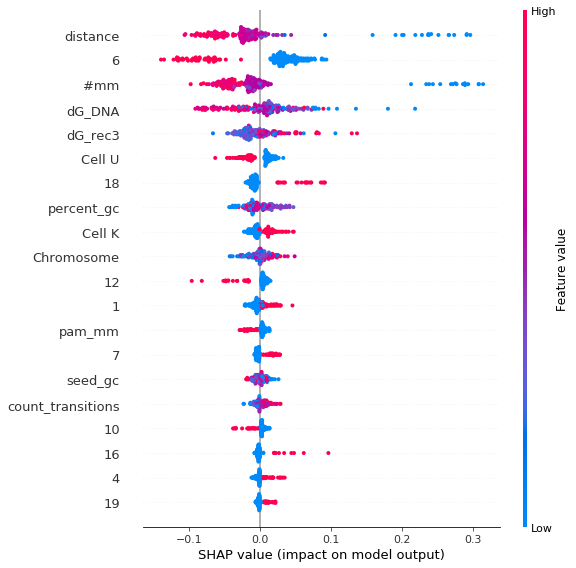

In [94]:
shap.summary_plot(shap_values, x)

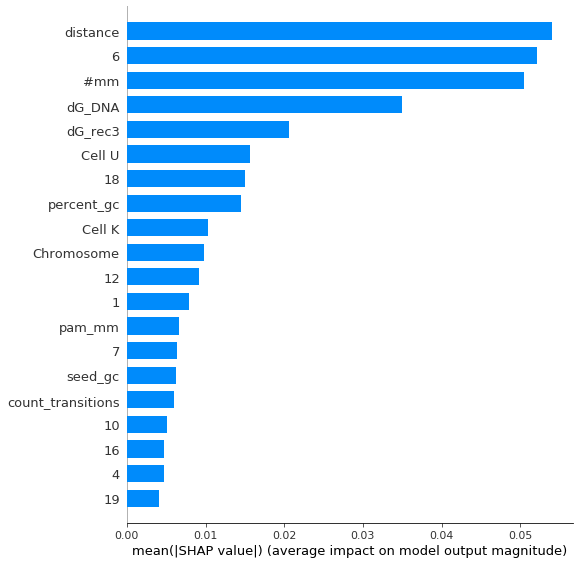

In [95]:
shap.summary_plot(shap_values, x, plot_type="bar")

In [148]:
x.head()

,1,2,3,4,5,6,7,8,9,10,...,pam_mm,pam_transitions,pam_transversions,count_transitions,count_transversions,distance,percent_gc,seed_gc,dG_rec3,dG_DNA
0,1,0,0,0,0,1,0,0,0,0,...,2,2,0,5,0,7,30.434783,50.0,-134.08,-165.35
1,1,0,0,0,0,1,0,0,0,0,...,2,2,0,5,0,7,30.434783,50.0,-134.08,-165.35
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,2,3,47.826087,40.0,-125.18,-146.79
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,2,3,47.826087,40.0,-125.18,-146.79
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52.173913,50.0,-120.50,-177.14


In [152]:
x.to_excel("D:\\IIT\\PhD projects\\Position study\\dG for off-t sets\\regression_df.xlsx")

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
Y_train_pred = pd.DataFrame(Y_train_pred, columns = ['Predicted'])
Y_test_pred = pd.DataFrame(Y_test_pred, columns = ['Predicted'])
print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, Y_test_pred))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, Y_test_pred))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred))
print("R squared value test:", metrics.r2_score(Y_test, Y_test_pred))
print("Variance weighted:", metrics.explained_variance_score(Y_test, Y_test_pred))

0.26891376666283234
[ 0.06128452  0.01274656  0.06362013 -0.03257686 -0.02670247 -0.19572994
 -0.06511945 -0.03335148 -0.10531869 -0.12083161  0.08586365 -0.08566022
  0.11707475 -0.06709121  0.04463435  0.16104125 -0.06129402  0.14036325
  0.08604948 -0.00634129 -0.01629621  0.10909547 -0.11962313 -0.00061535
  0.04332706 -0.04271171  0.00193693 -0.03786696  0.00322695 -0.01052766
 -0.0972872   0.08675954  0.00296551 -0.05712868 -0.06469083 -0.00471902
  0.00436829 -0.00150516 -0.00253713]
Mean absolute error train: 0.12854577872301273
Mean absolute error test: 0.18979731723857513
Mean squared value train: 0.026450892470206686
Mean squared value test: 0.06629207125955174
Root mean square value: 0.2574724669931753
R squared value train: 0.6780251510251725
R squared value test: 0.36784395944988957
Variance weighted: 0.3766648767509134


In [194]:
from sklearn.preprocessing import PolynomialFeatures

#quadratic regression
poly = PolynomialFeatures(degree = 2)
X2_train = poly.fit_transform(X_train)
X2_test= poly.fit_transform(X_test)
model = regressor.fit(X2_train, Y_train)
print("Mean absolute error:", metrics.mean_absolute_error(Y_test, model.predict(X2_test)))
print("Mean squared value:", metrics.mean_squared_error(Y_test, model.predict(X2_test)))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, model.predict(X2_test))))
print("R squared value:", metrics.r2_score(Y_test, model.predict(X2_test)))
print("Variance weighted:", metrics.explained_variance_score(Y_test, model.predict(X2_test)))

Mean absolute error: 1.2300873702930286
Mean squared value: 3.487831442809967
Root mean square value: 1.867573678013793
R squared value: -32.2596896295534
Variance weighted: -31.821221194050914


In [199]:
#Cubic regressor
poly1 = PolynomialFeatures(degree = 3)
X3_train = poly1.fit_transform(X_train)
X3_test= poly1.fit_transform(X_test)
model1 = regressor.fit(X3_train, Y_train)
print("Mean absolute error:", metrics.mean_absolute_error(Y_test, model1.predict(X3_test)))
print("Mean squared value:", metrics.mean_squared_error(Y_test, model1.predict(X3_test)))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, model1.predict(X3_test))))
print("R squared value:", metrics.r2_score(Y_test, model1.predict(X3_test)))
print("Variance weighted:", metrics.explained_variance_score(Y_test, model1.predict(X3_test)))

Mean absolute error: 0.5127256663592789
Mean squared value: 0.5401782720077544
Root mean square value: 0.7349682115627548
R squared value: -4.151098029304984
Variance weighted: -4.130382713620741
